### CORDEX File naming conventions
When you download a CORDEX file from the CDS it will have a naming convention that is as follows:
<variable>_<domain>_<driving-model>_<experiment>_<ensemble_member>_<rcm-model>_<rcm-run>_<time-frequency>_<temporal-range>.nc
Where
<variable> is a short variable name, e.g. “tas” for ”temperature at the surface”
    
<driving-model> is the name of the model that produced the boundary conditions
    
<experiment> is the name of the experiment used to extract the boundary conditions
<ensemble-member> is the ensemble identifier in the form “r<X>i<Y>p<Z>”, X, Y and Z are integers
<rcm-model> is the name of the model that produced the data
<rcm-run> is the version run of the model in the form of "vX" where X is integer
<time-frequency> is the time series frequency (e.g., monthly, daily, seasonal) 
the <temporal-range> is in the form YYYYMM[DDHH]-YYYY[MMDDHH], where Y is year, M is the month, D is day and H is hour. Note that day and hour are optional (indicated by the square brackets) and are only used if needed by the frequency of the data. For example daily data from the 1st of January 1980 to the 31st of December 2010 would be written 19800101-20101231.


In [ ]:
#adjust figure size
mpl.rcParams['figure.figsize'] = [10., 8.]

In [1]:
from dask.distributed import Client
import xarray as xr
import glob
import geopandas as gpd
#import regionmask
import numpy as np
#import load_data
from cartopy import crs as ccrs
import matplotlib.pyplot as plt
import cmocean
import os
os.environ["SPARSE_AUTO_DENSIFY"] = "1"

In [9]:
import summer_load_data as load_data

In [4]:
#path = "/pool/data/CORDEX/data/cordex/output/EUR-11/GERICS/MPI-M-MPI-ESM-LR/rcp85/r3i1p1/GERICS-REMO2015/v1/day/pr/v20190925/*"
path = "/pool/data/CORDEX/data/cordex/output/EUR-11/KNMI/ICHEC-EC-EARTH/rcp85/r3i1p1/KNMI-RACMO22E/v1/day/pr/v20190103/*.nc"
#path = "/work/ch0636/eddy/pool/sims/cordex/CORDEX-Adjust/EUR-11/*.nc"
files = glob.glob(path)
files.sort()
files

['/pool/data/CORDEX/data/cordex/output/EUR-11/KNMI/ICHEC-EC-EARTH/rcp85/r3i1p1/KNMI-RACMO22E/v1/day/pr/v20190103/pr_EUR-11_ICHEC-EC-EARTH_rcp85_r3i1p1_KNMI-RACMO22E_v1_day_20060101-20101231.nc',
 '/pool/data/CORDEX/data/cordex/output/EUR-11/KNMI/ICHEC-EC-EARTH/rcp85/r3i1p1/KNMI-RACMO22E/v1/day/pr/v20190103/pr_EUR-11_ICHEC-EC-EARTH_rcp85_r3i1p1_KNMI-RACMO22E_v1_day_20110101-20151231.nc',
 '/pool/data/CORDEX/data/cordex/output/EUR-11/KNMI/ICHEC-EC-EARTH/rcp85/r3i1p1/KNMI-RACMO22E/v1/day/pr/v20190103/pr_EUR-11_ICHEC-EC-EARTH_rcp85_r3i1p1_KNMI-RACMO22E_v1_day_20160101-20201231.nc',
 '/pool/data/CORDEX/data/cordex/output/EUR-11/KNMI/ICHEC-EC-EARTH/rcp85/r3i1p1/KNMI-RACMO22E/v1/day/pr/v20190103/pr_EUR-11_ICHEC-EC-EARTH_rcp85_r3i1p1_KNMI-RACMO22E_v1_day_20210101-20251231.nc',
 '/pool/data/CORDEX/data/cordex/output/EUR-11/KNMI/ICHEC-EC-EARTH/rcp85/r3i1p1/KNMI-RACMO22E/v1/day/pr/v20190103/pr_EUR-11_ICHEC-EC-EARTH_rcp85_r3i1p1_KNMI-RACMO22E_v1_day_20260101-20301231.nc',
 '/pool/data/CORDEX/data/

In [5]:
%%time
ds_cordex = xr.open_mfdataset(files, engine = "netcdf4",concat_dim="time", combine="nested",
                  data_vars='minimal', coords='minimal', compat='override')
ds_cordex

#ds = xr.open_mfdataset(files, combine="by_coords", coords="minimal", compat="override", join="override")

CPU times: user 211 ms, sys: 314 ms, total: 525 ms
Wall time: 3.37 s


<xarray.Dataset>
Dimensions:       (rlon: 424, rlat: 412, time: 34698, bnds: 2)
Coordinates:
  * rlon          (rlon) float64 -28.38 -28.27 -28.16 ... 17.93 18.05 18.16
    lon           (rlat, rlon) float64 dask.array<chunksize=(412, 424), meta=np.ndarray>
  * rlat          (rlat) float64 -23.38 -23.27 -23.16 ... 21.62 21.73 21.84
    lat           (rlat, rlon) float64 dask.array<chunksize=(412, 424), meta=np.ndarray>
  * time          (time) datetime64[ns] 2006-01-01T12:00:00 ... 2100-12-31T12...
Dimensions without coordinates: bnds
Data variables:
    rotated_pole  |S1 ...
    time_bnds     (time, bnds) datetime64[ns] dask.array<chunksize=(1826, 2), meta=np.ndarray>
    pr            (time, rlat, rlon) float32 dask.array<chunksize=(1826, 412, 424), meta=np.ndarray>
Attributes: (12/25)
    Conventions:                    CF-1.4
    contact:                        Erik van Meijgaard, KNMI, Regional Climat...
    experiment:                     RCP8.5 run
    experiment_id:                  rcp85
    realization:                    1
    driving_experiment:             ICHEC-EC-EARTH,rcp85,r3i1p1
    ...                             ...
    knmi_model_comment:             RACMO22E: baseline physics from ECMWF CY3...
    knmi_version_comment:           v1: reference version for Europe and othe...
    knmi_grib_path:                 mos.knmi.nl:/climreg/CXEUR12/eR2v2-v529-f...
    creation_date:                  2018-12-07T09:39:50Z
    c3s_disclaimer:                 This data has been produced in the contex...
    tracking_id:                    bd542c30-a4df-406d-9f4a-f59eff4dd3f8

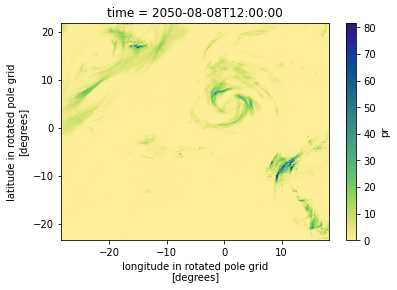

In [6]:
(ds_cordex.pr*86400).sel(time="2050-08-08").plot(cmap = cmocean.cm.haline_r)

In [10]:
hh_shape = load_data.get_hamburg_geodata()
hh_shape.plot()

DriverError: '/vsizip/./data/shapefiles/vg2500_01-01.gk3.shape.zip/vg2500_01-01.gk3.shape/vg2500/vg2500_lan.shp' does not exist in the file system, and is not recognized as a supported dataset name.